In [1]:
from mesa import Agent, Model
from mesa.space import NetworkGrid
from mesa.time import RandomActivation
from mesa.datacollection import DataCollector
import networkx as nx
import graph_init
import pandas as pd
import station as st

import network_example as ne
import numpy as np
import pathfinding as pf
import graph_functions as gf
import matplotlib.pyplot as plt
import Optimize_gradient_free as ogf
import model as m
import commuter as c
import bike_dist_hist as hist
import bike_dist_anim as anim

Could not import SolaraViz. If you need it, install with 'pip install --pre mesa[viz]'


In [12]:
### parameters
destinations_coords = [
    (0, -4.5), 
    (0, 4.5), 
#     (4.5, 0),
#     (-4.5, 0)
]

# weights for each station
w = [0.3, 0.7]

In [13]:
G,s,d = gf.create_graph_from_coordinates([], destinations_coords)

{0: {'pos': (-4.5, 0), 'type': 'destination', 'data': None}, 1: {'pos': (4.5, 0), 'type': 'destination', 'data': None}}


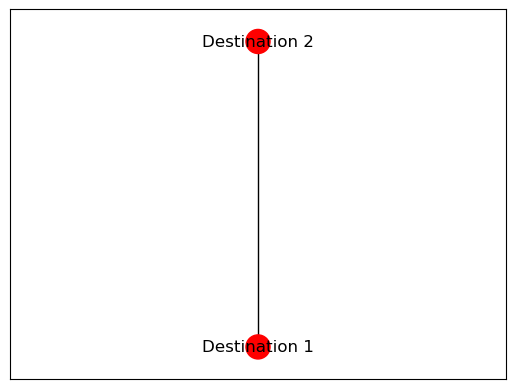

In [14]:
## visualize the initial destination graph, see which stations are which

pos = {i: d["Destination " + str(i+1)] for i in range(len(d))}
print(pos)
colors = ['r' if G.nodes[i]['type'] == 'destination' else 'b' for i in G.nodes]

# 4 point graph
# nx.draw_networkx(G, {"Destination 1": [0, -4.5], "Destination 2": [0, 4.5], "Destination 3": [4.5, 0], "Destination 4": [-4.5,0]}, node_color = colors, with_labels=True)

# # 2 point graph
nx.draw_networkx(G, {"Destination 1": [0, -4.5], "Destination 2": [0, 4.5]}, node_color = colors, with_labels=True)

-4.5


  0%|          | 0/50 [00:00<?, ?it/s]

Iteration 0: Best fitness: -3.0
Iteration 10: Best fitness: -3.9
Iteration 20: Best fitness: -3.9
Iteration 30: Best fitness: -3.9
Iteration 40: Best fitness: -3.9


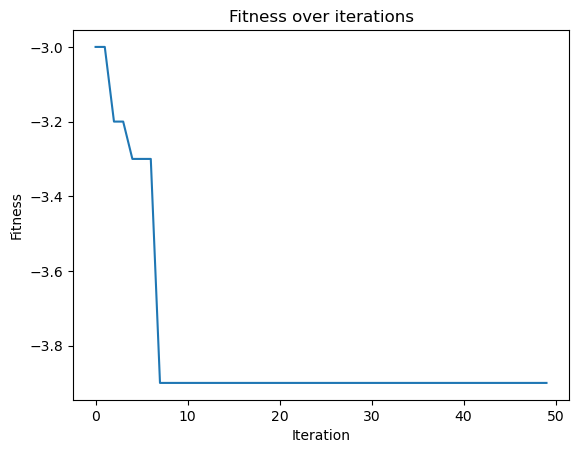

-3.9
[(-0.48071760079266584, 4.081847846259014), (0.24696128174886547, -3.5820850621525753)]


In [15]:
### code for PSO algorithm

destinations = [i for i in G.nodes if G.nodes[i]['type'] == 'destination']

#destinationcoords = [(pos[i][0], pos[i][1]) for i in destinations]
destinationcoords = [
    (0, -4.5), 
    (0, 4.5), 
    # (4.5, 0),
    # (-4.5, 0)
]
#destinationlist = np.array([[pos[i][0], pos[i][1]] for i in destinations])
G,s,d = gf.create_graph_from_coordinates([], destinationcoords)
citymap = [(-6,-6), (6,6)] + destinationcoords
def fitness(coordinatelist):
    destinations = coordinatelist["destination"]
    stations = coordinatelist["station"]
    G, s, d, = gf.create_graph_from_coordinates(stations, destinations)
    model = m.MyModel(20, seed=1, G=G, weights = w)
    for i in range(100):
        model.step()
    return model.walking_average()

print(fitness({"destination": destinationcoords, "station": destinationcoords}))

optimizer = ogf.Optimize(citymap, fitness, 0.7,1.4,1.4)
bestpos, bestfit = optimizer.optimize_PSO(20, 2, 50)
optimizer.plot_losses()
print(bestfit)
stations = [(bestpos[i], bestpos[i+1]) for i in range(0, len(bestpos), 2)]
print(stations)
G, s, d, = gf.create_graph_from_coordinates(stations, destinationcoords)

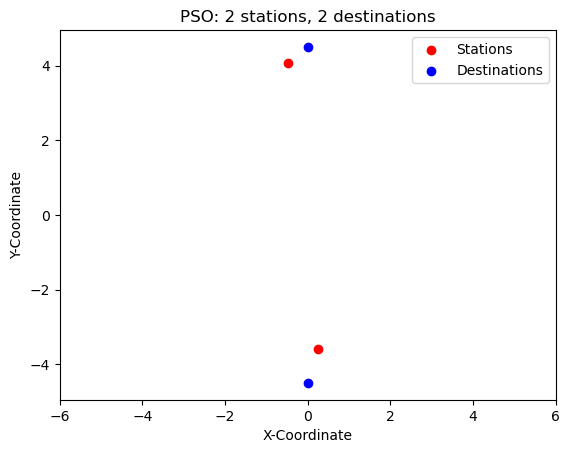

In [18]:
plt.scatter([station[0] for station in stations], [station[1] for station in stations], c='red', label='Stations')
plt.scatter([destination[0] for destination in destinationcoords], [destination[1] for destination in destinationcoords], c='blue', label='Destinations')
plt.xlabel('X-Coordinate')
plt.ylabel('Y-Coordinate')
plt.xlim(-6, 6)

plt.title('PSO: 2 stations, 2 destinations')
plt.legend()
plt.savefig('PSO_2_2_2weight.png')
plt.show()